In [1]:
import os
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
#import scipy.optimize
import pandas as pd
import lmfit
import re

In [2]:
data_path = '/SNS/VENUS/IPTS-35945/shared/images_normalized/Gd Mask Normalization' 
assert os.path.exists(data_path)

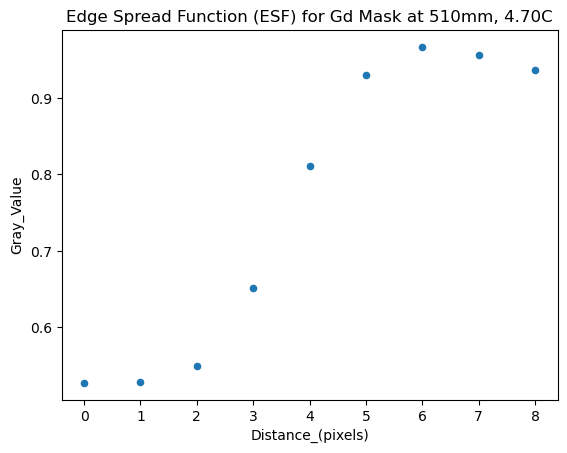

In [3]:
#Pulls data from ImageJ flux histogram, shows the edge spread function (ESF)
df = pd.read_csv ('/SNS/VENUS/IPTS-35945/shared/images_normalized/Gd Mask Normalization/normalized_sample_7998_obs_8015/NewESFforFWHM1022JUN1825.csv')
#df['Gray_Value']= -1* df['Gray_Value']
#run_7998_data = np.loadtxt(data_path, '/normalized_sample_7998_obs_8015/EdgeSpreadFunction', delimiter= ',')
#x = df[:,0]
#y = df[:,1]
plot = df.plot(x='Distance_(pixels)',y='Gray_Value', kind="scatter", title="Edge Spread Function (ESF) for Gd Mask at 510mm, 4.70C")

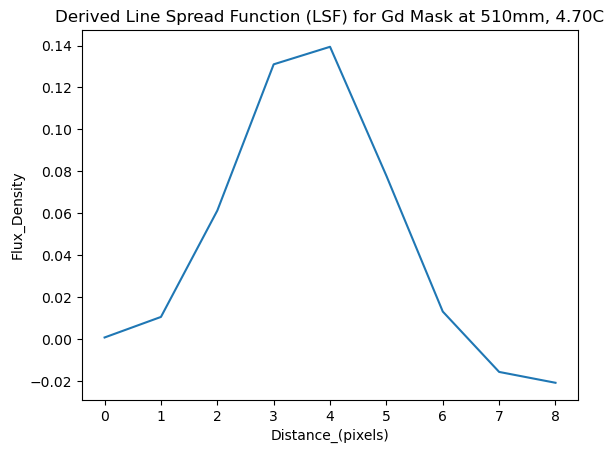

In [4]:
#Derives line spread function (LSF) from edge spread function (ESF)
df1 = df["Gray_Value"] #takes in df (2D) and selects a single dimension (gray values) to differentiate over

#numpy.gradient method for determining derivative function for the LSF curve
dydxdf = np.gradient(df1, 1)
plt.title("Derived Line Spread Function (LSF) for Gd Mask at 510mm, 4.70C")
plt.xlabel("Distance_(pixels)")
plt.ylabel("Flux_Density")
plt.plot(dydxdf)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 9
    # variables        = 3
    chi-square         = 8.0450e-04
    reduced chi-square = 1.3408e-04
    Akaike info crit   = -77.9025996
    Bayesian info crit = -77.3109258
    R-squared          = 0.97296053
[[Variables]]
    amplitude:  0.43837206 +/- 0.02880474 (6.57%) (init = 0.7202047)
    center:     3.59438908 +/- 0.08826247 (2.46%) (init = 3.5)
    sigma:      1.16346690 +/- 0.08830346 (7.59%) (init = 1.5)
    fwhm:       2.73975514 +/- 0.20793875 (7.59%) == '2.3548200*sigma'
    height:     0.15031382 +/- 0.00987733 (6.57%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) = +0.5775
<bound method ModelResult.fit_report of <lmfit.model.ModelResult object at 0x7f102d576990>>
R-squared: 0.97296053
FWHM: 2.73975514


<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3583976/2229726203.py:16: SyntaxWarning: invalid escape sequence '\s'
  '''r_squared_G = r"R-squared\s*=\s*([0-9\.e\-]+)"
/SNS/users/9ix/notebooks/python_notebooks/notebooks/users_notebooks/MCP_Sensor_Resolution/.pixi/envs/default/lib/python3.13/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


<Axes: title={'center': 'Model(gaussian)'}, xlabel='x', ylabel='y'>

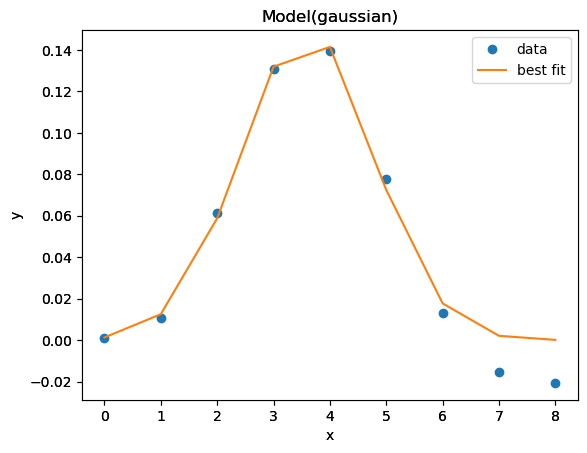

In [7]:
#Gaussian fit model
#print (dydxdf)
from numpy import loadtxt
from lmfit.models import GaussianModel
y = dydxdf
x = np.arange(len(y))
mod = GaussianModel()
pars = mod.guess(y, x=x)
out = mod.fit(y,pars, x=x)
print (out.fit_report(min_correl=.25))
print (out.fit_report)
out.plot_fit()
#outputstring = out.fit_report(min_correl=.25)
r_squared_G=out.rsquared
FWHM_G=out.params['fwhm'].value
'''r_squared_G = r"R-squared\s*=\s*([0-9\.e\-]+)"
FWHM_G = r"fwhm:\s*([\d\.e\-]+)"
r_squared_match_G = out.fit_report()
r_squared_value_G = float(r_squared_match_G.group(1)) if r_squared_match_G else None
FWHM_matches_G = re.search(FWHM_G, outputstring)
fwhm_value_G = float(FWHM_matches_G.group(1)) if FWHM_matches_G else None'''
print(f"R-squared: {r_squared_G:.8f}")
print(f"FWHM: {FWHM_G:.8f}")
out.plot_fit()

In [ ]:
#Lorentzian fit model
from numpy import loadtxt
from lmfit.models import LorentzianModel
y = dydxdf
x = np.arange(len(y))
mod = LorentzianModel()
pars = mod.guess(y, x=x)
outL = mod.fit(y,pars, x=x)
print (outL.fit_report(min_correl=.25))
outL.plot_fit()
#outputstring = outL.fit_report(min_correl=.25)
r_squared_L = outL.rsquared
#r_squared_L = r"R-squared\s*=\s*([0-9\.e\-]+)"
#FWHM_L = r"fwhm:\s*([\d\.e\-]+)"
#r_squared_match_L = re.search(r_squared_L, outputstring)
#r_squared_value_L = float(r_squared_match_L.group(1)) if r_squared_match_L else None
#FWHM_matches_L = re.search(FWHM_L, outputstring)
FWHM_L=out.params['fwhm'].value
#fwhm_value_L = float(FWHM_matches_L.group(1)) if FWHM_matches_L else None
print(f"R-squared: {r_squared_value_L:.8f}")
print(f"FWHM: {fwhm_value_L:.8f}")

In [ ]:
#Voigt fit model
from numpy import loadtxt
from lmfit.models import VoigtModel
y = dydxdf
x = np.arange(len(y))
mod = VoigtModel()
pars = mod.guess(y, x=x)
outV = mod.fit(y,pars, x=x)
print (outV.fit_report(min_correl=.25))
outV.plot_fit()
outputstring = outV.fit_report(min_correl=.25)
r_squared_V = r"R-squared\s*=\s*([0-9\.e\-]+)"
FWHM_V = r"fwhm:\s*([\d\.e\-]+)"
r_squared_match_V = re.search(r_squared_V, outputstring)
r_squared_value_V = float(r_squared_match_V.group(1)) if r_squared_match_V else None
FWHM_matches_V = re.search(FWHM_V, outputstring)
fwhm_value_V = float(FWHM_matches_V.group(1)) if FWHM_matches_V else None
print(f"R-squared: {r_squared_value_V:.8f}")
print(f"FWHM: {fwhm_value_V:.8f}")

In [ ]:
img1 = mpimg.imread(data_path+"/normalized_sample_7998_obs_8015/The edge for FWHM test.png")
plt.axis('off')
plt.title ('Region of Interest')
plt.imshow(img1)

In [ ]:
df.plot(x='Distance_(pixels)',y='Gray_Value', kind="scatter", title="Edge Spread Function for Gd Mask at 510mm, 4.70C")

In [ ]:
#Determines best model fit by comparing R-squared values, selects that one to determine FWHM value from
class Model:
        def __init__ (self, name ,r_squared, fwhm):
            self.name = name 
            self.r_squared = r_squared 
            self.fwhm = fwhm 
        def get_r_squared(self):
                return self.r_squared
        def get_fwhm(self):
              return self.fwhm
ModelG = Model("Gaussian",r_squared_value_G,fwhm_value_G)
ModelL = Model("Lorentzian", r_squared_value_L, fwhm_value_L)
ModelV = Model("Voigt", r_squared_value_V, fwhm_value_V)
models = [ModelG, ModelL, ModelV]
best_model = max (models, key=lambda model: model.get_r_squared())
pixel_density = .055 *best_model.get_fwhm() #mm
print (f"The best fit for this data is the {best_model.name} fit with a R-squared value of {best_model.get_r_squared():.8f}.")
print (f"The FWHM value of the {best_model.name} is {best_model.get_fwhm():.8f} pixels, yielding an empirical resolution of {pixel_density:.8f} millimeters.")